In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97736 sha256=20c5e9dd01c1b98f65c7a0acdd5f605644fbc25e54b8192f33728b83bf73f6e3
  Stored in directory: /root/.cache/pip/wheels/59/70/ee/99a0df99d8b4a7b87c79640ebee0927c0f6ccff046e9cc2471
Successfully built pyLDAvis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from collections import Counter


import re

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')


import nltk
nltk.download('omw-1.4')

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer


import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim



import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from gensim.models import LdaModel


import pandas as pd
import numpy as np
import scipy

from scipy.special import logsumexp

from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer


from tensorflow.keras.preprocessing.sequence import pad_sequences



from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, Dropout, TimeDistributed
from sklearn.model_selection import train_test_split




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
path = "/content/drive/My Drive/nlp_dataset_directory/snscrap_tweets.csv"
df = pd.read_csv(path)

In [ ]:
# # setting up twint config

# c= twint.Config()

# # extracting data from twitter

# c.Search = '"distance education" OR "education" OR "distance learning" OR "e-learning" OR "online learning"'
# c.Lang="en"
# c.Pandas= True
# c.Limit= 5000

# twint.run.Search(c)


In [ ]:
# # Saving in dataframe

# def columne_names():
#     return twint.output.panda.Tweets_df.columns

In [ ]:
# def twint_to_pd(columns):
#     return twint.output.panda.Tweets_df[columns]

In [ ]:
# data= twint_to_pd(["date", "tweet"])

# # Export to csv file
# data.to_csv("twint.csv")

In [ ]:
# data.head()

In [ ]:
# df = pd.read_csv('twint.csv')
# data = df

In [ ]:
# # Remove duplicate tweets: To remove duplicate tweets, you can use the drop_duplicates method from the pandas library.
df['tweet'] = df['Text']
df.drop_duplicates(subset='tweet', inplace=True)

In [ ]:
len(df)

196132

In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username,tweet
0,2022-05-04 23:56:39+00:00,1522002298087657472,@JamesDeanBoyd @mrcleancousin @mightyzo What? ...,JeanLucKnows,@JamesDeanBoyd @mrcleancousin @mightyzo What? ...
1,2022-05-04 23:51:35+00:00,1522001019181404160,Post-Pandemic we have learned how online educa...,martalaura,Post-Pandemic we have learned how online educa...
2,2022-05-04 23:44:20+00:00,1521999195779043330,@Mcgiver69 @AaronBastani The miners who lost t...,25655578m,@Mcgiver69 @AaronBastani The miners who lost t...
3,2022-05-04 23:42:38+00:00,1521998766672207873,I have a chronic muscular condition that makes...,lucymakesmaps,I have a chronic muscular condition that makes...
4,2022-05-04 23:34:53+00:00,1521996819013771269,…What? Doug Ford won the last election because...,essentialyes,…What? Doug Ford won the last election because...


In [ ]:
# Remove irrelevant information such as URLs, mentions (@), hashtags (#), and numbers: To remove this information, you can use regular expressions (regex) and the 're' library in Python.



def clean_text(text):
    text = re.sub(r'https?://\S+', '', text) # remove URLs
    text = re.sub(r'@\w+', '', text) # remove mentions
    text = re.sub(r'#\w+', '', text) # remove hashtags
    text = re.sub(r'\d+', '', text) # remove numbers
    return text

df['tweet'] = df['tweet'].apply(clean_text)




In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username,tweet
0,2022-05-04 23:56:39+00:00,1522002298087657472,@JamesDeanBoyd @mrcleancousin @mightyzo What? ...,JeanLucKnows,"What? Quality of education, of health, of l..."
1,2022-05-04 23:51:35+00:00,1522001019181404160,Post-Pandemic we have learned how online educa...,martalaura,Post-Pandemic we have learned how online educa...
2,2022-05-04 23:44:20+00:00,1521999195779043330,@Mcgiver69 @AaronBastani The miners who lost t...,25655578m,The miners who lost to Thatcher and long las...
3,2022-05-04 23:42:38+00:00,1521998766672207873,I have a chronic muscular condition that makes...,lucymakesmaps,I have a chronic muscular condition that makes...
4,2022-05-04 23:34:53+00:00,1521996819013771269,…What? Doug Ford won the last election because...,essentialyes,…What? Doug Ford won the last election because...


In [ ]:
#  remove_emoticons function to remove emojis 

def remove_emoticons(text):
    emoji_pattern = re.compile("["
        u"\U0001f600-\U0001f64f"  # emoticons
        u"\U0001f300-\U0001f5ff"  # symbols & pictographs
        u"\U0001f680-\U0001f6ff"  # transport & map symbols
        u"\U0001f1e0-\U0001f1ff"  # flags (iOS)
        u"\U00002702-\U000027b0"
        u"\U000024C2-\U0001f251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# Remove emojis from the text column
df['tweet'] = df['tweet'].apply(remove_emoticons)

In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username,tweet
0,2022-05-04 23:56:39+00:00,1522002298087657472,@JamesDeanBoyd @mrcleancousin @mightyzo What? ...,JeanLucKnows,"What? Quality of education, of health, of l..."
1,2022-05-04 23:51:35+00:00,1522001019181404160,Post-Pandemic we have learned how online educa...,martalaura,Post-Pandemic we have learned how online educa...
2,2022-05-04 23:44:20+00:00,1521999195779043330,@Mcgiver69 @AaronBastani The miners who lost t...,25655578m,The miners who lost to Thatcher and long las...
3,2022-05-04 23:42:38+00:00,1521998766672207873,I have a chronic muscular condition that makes...,lucymakesmaps,I have a chronic muscular condition that makes...
4,2022-05-04 23:34:53+00:00,1521996819013771269,…What? Doug Ford won the last election because...,essentialyes,…What? Doug Ford won the last election because...


In [ ]:
#df = pd.read_csv('refined.csv')

In [ ]:
#df.to_csv("other.csv")

In [ ]:
df.head()

,Unnamed: 0,date,tweet
0,0,2023-02-08 10:42:57,Education = war? No thanks!
1,1,2023-02-08 10:42:55,Back-to-school for me to get into UP online le...
2,2,2023-02-08 10:42:55,This is the women who's state has an overall ...
3,3,2023-02-08 10:42:53,sir desh ke logo ko acha education acha healt...
4,4,2023-02-08 10:42:53,"A non-woke, world-class education and a borde..."


In [ ]:
#Tokenize and normalize the text: To split the text into individual words and normalize the text, you can use the 'nltk' library.



stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() # lowercase text
    tokens = word_tokenize(text) # tokenize text
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2] # remove stop words and short words
    return ' '.join(tokens)

df['tweet'] = df['tweet'].apply(preprocess_text)


In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username,tweet
0,2022-05-04 23:56:39+00:00,1522002298087657472,@JamesDeanBoyd @mrcleancousin @mightyzo What? ...,JeanLucKnows,quality education health lives idiocy complace...
1,2022-05-04 23:51:35+00:00,1522001019181404160,Post-Pandemic we have learned how online educa...,martalaura,post-pandemic learned online education communi...
2,2022-05-04 23:44:20+00:00,1521999195779043330,@Mcgiver69 @AaronBastani The miners who lost t...,25655578m,miners lost thatcher long lasting damage union...
3,2022-05-04 23:42:38+00:00,1521998766672207873,I have a chronic muscular condition that makes...,lucymakesmaps,chronic muscular condition makes hard breathe ...
4,2022-05-04 23:34:53+00:00,1521996819013771269,…What? Doug Ford won the last election because...,essentialyes,…what doug ford last election people mad wynne...


In [ ]:
# # implementation of stemming using the nltk library
    
    
# from nltk.stem import PorterStemmer

# def stem_text(text):
#    stemmer = PorterStemmer()
#    tokens = text.split()
#    stemmed_tokens = [stemmer.stem(token) for token in tokens]
#    return ' '.join(stemmed_tokens)

# df['tweet'] = df['tweet'].apply(stem_text)

In [ ]:
## Remove rows where the "tweet" column has less than 3 words
df = df[df["tweet"].str.split().str.len() >= 3]

In [ ]:
df.head()

NameError: ignored

In [ ]:
# use the 'langdetect' library to remove non-English words from a tweet



def remove_non_english(text):
    words = text.split()
    english_words = []
    for word in words:
        try:
            if detect(word) == 'en':
                english_words.append(word)
        except:
            pass
    return ' '.join(english_words)


# Apply the remove_non_english function to the "text" column
df['tweet'] = df['tweet'].apply(remove_non_english)



In [ ]:
df.head()

NameError: ignored

In [ ]:
# Handle missing values: To handle missing values, you can either remove the missing values or fill them in with a suitable value.

df.dropna(subset=['tweet'], inplace=True) # remove missing values
df = df[df['tweet'].str.strip() != '']


C:\Users\Rehan\AppData\Local\Temp\ipykernel_5568\961575098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['tweet'], inplace=True) # remove missing values


#### Lemmatization has higher accuracy than stemming. Lemmatization is preferred for context analysis, whereas stemming is recommended when the context is not important. Both stemming and lemmatization can help reduce the size of the text and simplify the sentiment analysis, but lemmatization is generally considered more effective in preserving the meaning of the words in the text. The choice between stemming and lemmatization depends on the specific requirements and characteristics of your twitter dataset and the desired outcomes of the sentiment analysis.

In [ ]:
# implementation of lemmatization using the 'nltk' library



def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df['tweet'] = df['tweet'].apply(lemmatize_text)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rehan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rehan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,Unnamed: 0,date,tweet
0,0,2023-02-08 10:42:57,education thanks
1,1,2023-02-08 10:42:55,back-to-school learning learn
2,2,2023-02-08 10:42:55,education nothing
3,3,2023-02-08 10:42:53,education health
4,4,2023-02-08 10:42:53,world-class education


In [ ]:
data = df

C:\Users\Rehan\AppData\Local\Temp\ipykernel_5568\2758286345.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, fontsize=12)
C:\Users\Rehan\AppData\Local\Temp\ipykernel_5568\2758286345.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontsize=12)


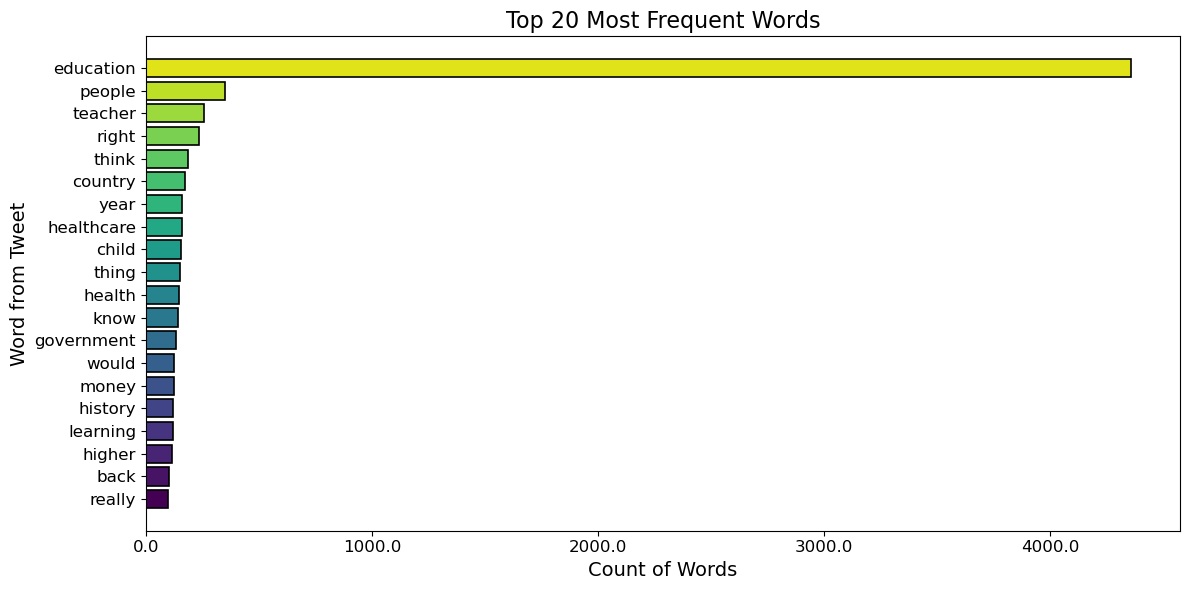

In [ ]:

def plot_word_frequency(dataframe, column, top_n=20):
    # Tokenize the text column
    words = ' '.join(dataframe[column]).lower().split()

    # Count the frequency of each word
    word_frequency = Counter(words)

    # Plot the top N most frequent words
    top_words = word_frequency.most_common(top_n)
    top_words = sorted(top_words, key=lambda x: x[1], reverse=False)
    labels, values = zip(*top_words)
    fig, ax = plt.subplots(figsize=(12, 6))
    gradient = cm.get_cmap('viridis')
    ax.barh(labels, values, color=[gradient(i/top_n) for i in range(top_n)], edgecolor='black', linewidth=1.2)
    ax.set_xlabel('Count of Words', fontsize=14)
    ax.set_ylabel('Word from Tweet', fontsize=14)
    ax.set_title('Top {} Most Frequent Words'.format(top_n), fontsize=16)
    ax.set_yticklabels(labels, fontsize=12)
    ax.set_xticklabels(ax.get_xticks(), fontsize=12)
    plt.tight_layout()
    plt.show()


# Plot the top 20 most frequent words in the text column
plot_word_frequency(data, 'tweet', top_n=20)

In [ ]:
#data.to_csv("refined.csv")

In [ ]:
df.to_csv("refined.csv")

In [ ]:
# df = pd.read_csv('refined.csv')

In [ ]:
df.head()

,Unnamed: 0,date,tweet
0,0,2023-02-08 10:42:57,education thanks
1,1,2023-02-08 10:42:55,back-to-school learning learn
2,2,2023-02-08 10:42:55,education nothing
3,3,2023-02-08 10:42:53,education health
4,4,2023-02-08 10:42:53,world-class education


### vader pre trained model is used to suppervise data

In [ ]:

vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rehan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df['sentiment'] = df['tweet'].apply(vader.polarity_scores)

df['compound_score'] = df['sentiment'].apply(lambda x: x['compound'])

In [ ]:
def map_sentiment(score):
    if score >= 0:
        return 'positive'
    else:
        return 'negative'

df['sentiment'] = df['compound_score'].apply(map_sentiment)

In [ ]:
df.to_csv('analyzed_twitter_dataset.csv', index=False)

### LDA Topic Modeling

In [ ]:
# !pip uninstall pyLDAvis

In [ ]:
# !pip install pyLDAvis==2.1.2

In [ ]:
# !pip install gensim
# !pip install pyLDAvis

In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset/200K supervised_twitter_dataset.csv')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

##### `tokens_list = [word_tokenize(tweet) for tweet in df['tweet'].values.tolist()]`
This line tokenizes each tweet in the `df['tweet']` column of a given dataframe (`df`) using the `word_tokenize()` function from the NLTK library. The resulting tokens are stored in a list called `tokens_list`.

<span style="color:gray">Tokenization is a necessary step in the LDA topic modeling process because it breaks up the text into smaller units or tokens, such as words or phrases. These tokens are then used to create a bag-of-words representation of the text, which is an input to the LDA algorithm.<br><br>
The bag-of-words representation treats each document as a collection of words, ignoring the order of the words and only considering their frequency. This approach allows the LDA algorithm to model the underlying topics of the text based on the co-occurrence patterns of words in the text.<br><br>
Therefore, in order to perform LDA on a set of texts, we need to first tokenize them into individual words or phrases, and then convert them into a bag-of-words representation, which can then be fed into the LDA algorithm to extract topics.</span>

***

##### `dictionary = corpora.Dictionary(tokens_list)`
This line creates a dictionary from the tokenized words in `tokens_list` using the `Dictionary()` function from the Gensim library. This dictionary will be used to convert the tokens into a bag-of-words representation.

***

##### `corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]`
This line creates a bag-of-words representation of each tweet in `tokens_list` using the `doc2bow()` function from the Gensim library. The resulting bag-of-words representations are stored in a list called `corpus`.

***

##### `ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=50)`
This line creates an LDA model using the `LdaModel()` function from the Gensim library. The model is trained on the bag-of-words representations in `corpus`, and is configured to generate 3 topics using the `num_topics` parameter. The `id2word` parameter specifies the dictionary created in the previous step, and the `passes` parameter controls the number of times the dataset is iterated over during training.

***

##### `vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)`
This line creates an interactive visualization of the LDA model using the `prepare()` function from the pyLDAvis library. The `ldamodel` parameter specifies the trained LDA model, the corpus parameter specifies the bag-of-words representations, and the `dictionary` parameter specifies the dictionary created in step 2.

***

##### `pyLDAvis.show(vis)`
This line displays the visualization in a web browser using the `show()` function from the pyLDAvis library. The visualization shows the topics generated by the LDA model and their associated keywords, as well as how frequently each keyword occurs in each topic. It also displays an interactive plot that allows users to explore the relationships between the topics and the tweets in the dataset.

In [ ]:
tokens_list = [word_tokenize(tweet) for tweet in df['tweet'].values.tolist()]

#print(tokens_list)

# Convert the tokens list into a bag-of-words representation
dictionary = corpora.Dictionary(tokens_list)
corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]

print(corpus)

# Train an LDA model on the corpus
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=50)

# Visualize the topics
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.show(vis)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: ignored

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install keras

## LSTM applied

In [ ]:
#! pip install scipy==1.1.0

     -------------------------------------- 15.6/15.6 MB 237.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scipy
Failed to build scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
  Running setup.py install for scipy: started
  Running setup.py install for scipy: finished with status 'error'
  Rolling back uninstall of scipy
  Moving to c:\users\rehan\anaconda3\lib\site-packages\scipy
   from C:\Users\Rehan\anaconda3\Lib\site-packages\~cipy
  Moving to c:\users\rehan\anaconda3\lib\site-packages\scipy-1.9.1-py3.9.egg-info
   from C:\Users\Rehan\anaconda3\Lib\site-packages\~cipy-1.9.1-py3.9.egg-info


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [141 lines of output]
  C:\Users\Rehan\AppData\Local\Temp\pip-install-pyjbjmxa\scipy_074dfbae57264adca8102fae60c5ae15\setup.py:114: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
    import imp
  lapack_opt_info:
  lapack_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:/Users/Rehan/anaconda3\\Library\\lib']
    NOT AVAILABLE
  
  openblas_lapack_info:
    libraries openblas not found in ['C:\\Users\\Rehan\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Rehan\\anaconda3\\libs']
  get_default_fcompiler: matching types: '['gnu', 'intelv', 'absoft', 'compaqv', 'intelev', 'gnu95', 'g95', 'intelvem', 'intelem', 'flang']'
  customize GnuFCompiler
  Could not locate executable g77
  Could not loca

In [ ]:
# Load the dataset into a pandas dataframe
df = pd.read_csv("/content/drive/My Drive/dataset/200K supervised_twitter_dataset.csv")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Use the Tokenizer to convert the words in the "tweet" column to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["tweet"])
X = tokenizer.texts_to_sequences(df["tweet"])
X = pad_sequences(X, maxlen=50)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert positive and negative sentiments to 1 and 0 integers
df["sentiment"] = df["sentiment"].apply(lambda x: 1 if x == "positive" else 0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Split the dataset into training and test sets
y = df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# ! pip install gensim==3.0.0

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Perform Word2Vec on the integer representation of the "tweet" column to extract 100 dimensional vectors
sentences = [row.split() for row in df["tweet"]]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word2vec_vectors = word2vec_model.wv
vocab_size = len(tokenizer.word_index) + 1
embedded_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_vectors:
        embedded_matrix[i] = word2vec_vectors[word]
    

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,tweet,Username,sentiment,compound_score
0,2022-05-04 23:56:39+00:00,1522002298087657472,quality education health life idiocy complacen...,JeanLucKnows,0,-0.1531
1,2022-05-04 23:51:35+00:00,1522001019181404160,post-pandemic learned online education communi...,martalaura,1,0.8360
2,2022-05-04 23:44:20+00:00,1521999195779043330,miner lost thatcher long lasting damage union ...,25655578m,0,-0.9153
3,2022-05-04 23:42:38+00:00,1521998766672207873,chronic muscular condition make hard breathe f...,lucymakesmaps,1,0.1010
4,2022-05-04 23:34:53+00:00,1521996819013771269,…what doug ford last election people mad wynne...,essentialyes,0,-0.6486


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


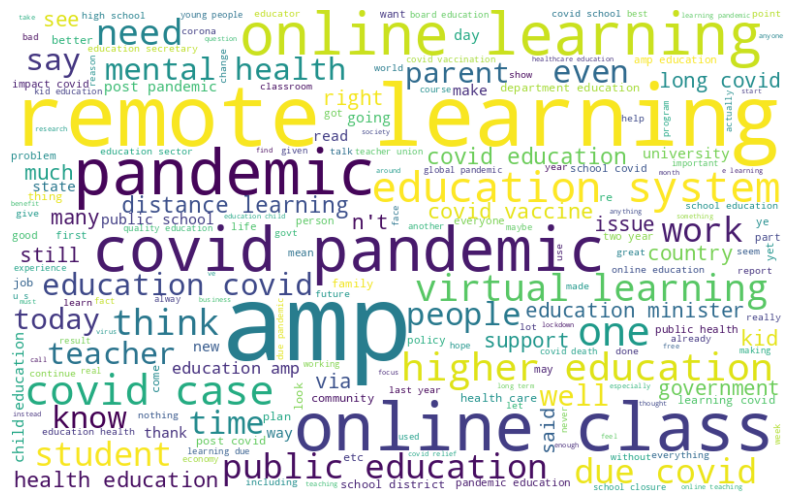

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


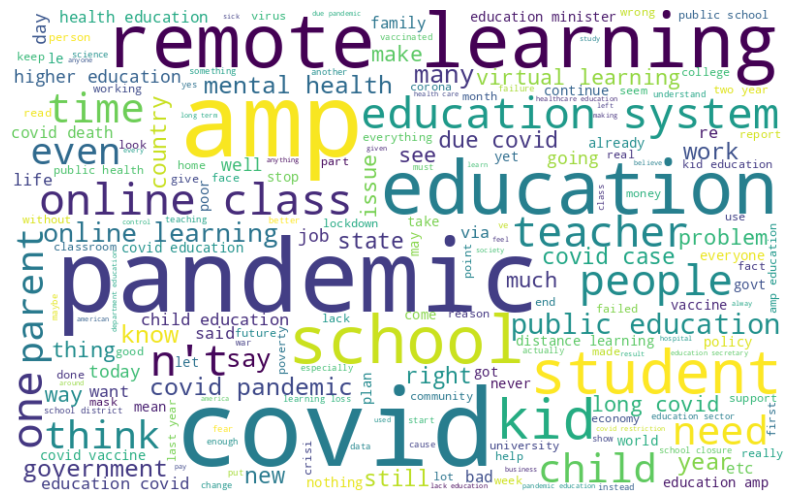

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


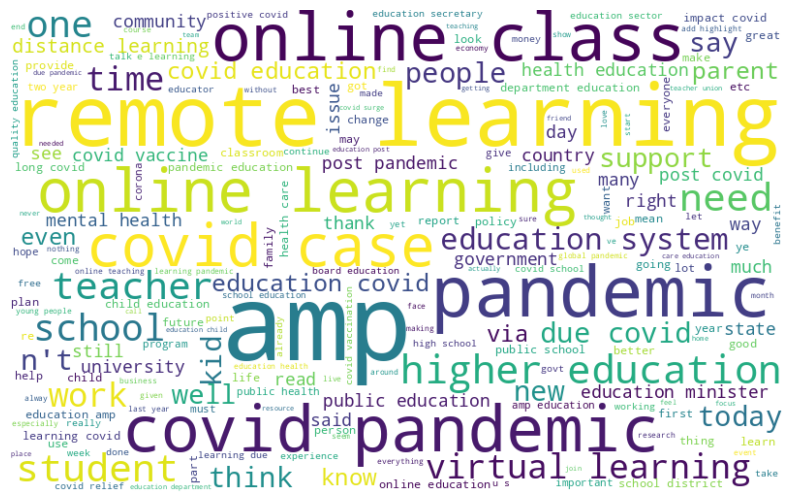

In [ ]:
from wordcloud import WordCloud

# Get all words in the tweets
all_words = ' '.join([tweet for tweet in df['tweet']])

# Generate a word cloud for all tweets
all_wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(all_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Get all words in the negative tweets
neg_words = ' '.join([tweet for tweet in df[df['sentiment']==0]['tweet']])

# Generate a word cloud for negative tweets
neg_wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Get all words in the positive tweets
pos_words = ' '.join([tweet for tweet in df[df['sentiment']==1]['tweet']])

# Generate a word cloud for positive tweets
pos_wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Feed the data to the LSTM model using the Keras library
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedded_matrix], input_length=50, trainable=False))
lstm_model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation="sigmoid"))
lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
115/115 [==============================] - 29s 179ms/step - loss: 0.3428 - accuracy: 0.8976 - val_loss: 0.3155 - val_accuracy: 0.9021
Epoch 2/5
115/115 [==============================] - 19s 162ms/step - loss: 0.3228 - accuracy: 0.8976 - val_loss: 0.3111 - val_accuracy: 0.9021
Epoch 3/5
115/115 [==============================] - 19s 166ms/step - loss: 0.3199 - accuracy: 0.8976 - val_loss: 0.3057 - val_accuracy: 0.9021
Epoch 4/5
115/115 [==============================] - 28s 244ms/step - loss: 0.3174 - accuracy: 0.8976 - val_loss: 0.3049 - val_accuracy: 0.9021
Epoch 5/5
115/115 [==============================] - 18s 156ms/step - loss: 0.3155 - accuracy: 0.8976 - val_loss: 0.3043 - val_accuracy: 0.9021


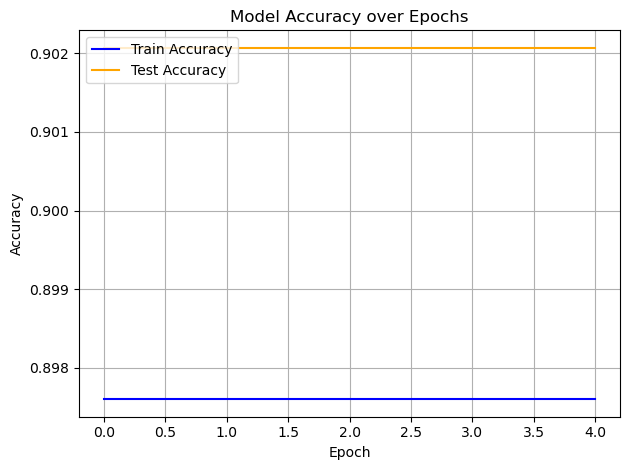

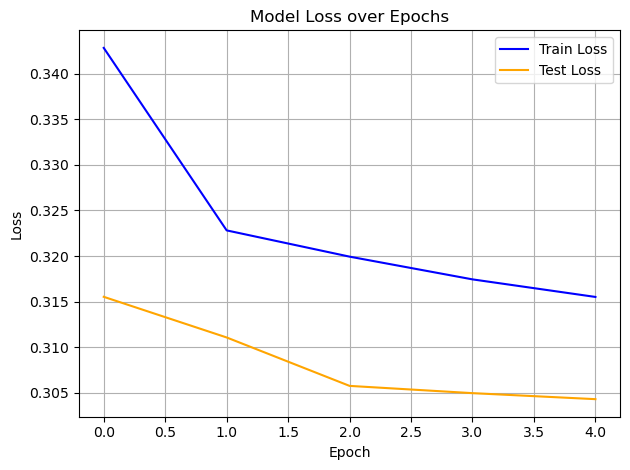

In [ ]:

# Plot train and test accuracy
plt.plot(history.history['accuracy'], color='blue', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Test Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot train and test loss
plt.plot(history.history['loss'], color='blue', label='Train Loss')
plt.plot(history.history['val_loss'], color='orange', label='Test Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#!pip show gensim


Name: gensim
Version: 3.0.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: 
Location: c:\users\rehan\anaconda3\lib\site-packages
Requires: numpy, scipy, six, smart-open
Required-by: 


In [ ]:
#!pip show keras

Name: keras
Version: 2.11.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: c:\users\rehan\anaconda3\lib\site-packages
Requires: 
Required-by: tensorflow-intel


In [ ]:
#!pip show tensorflow

Name: tensorflow
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\rehan\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [ ]:
#! pip install gensim==4.1.2

     ---------------------------------------- 24.0/24.0 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.32
    Uninstalling Cython-0.29.32:
      Successfully uninstalled Cython-0.29.32
  Attempting uninstall: gensim
    Found existing installation: gensim 3.0.0
    Uninstalling gensim-3.0.0:
      Successfully uninstalled gensim-3.0.0


### RNN

In [ ]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedded_matrix], input_length=50, trainable=False))
rnn_model.add(SimpleRNN(units=32, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(1, activation="sigmoid"))
rnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = rnn_model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

NameError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# create the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedded_matrix], input_length=50, trainable=False))
rnn_model.add(SimpleRNN(units=64, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(1, activation="sigmoid"))

# compile the model
rnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# fit the model to the training data
history = rnn_model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/2
4890/4890 [==============================] - 148s 29ms/step - loss: 0.5690 - accuracy: 0.7107 - val_loss: 0.5165 - val_accuracy: 0.7562
Epoch 2/2
4890/4890 [==============================] - 138s 28ms/step - loss: 0.5616 - accuracy: 0.7127 - val_loss: 0.5837 - val_accuracy: 0.7198


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


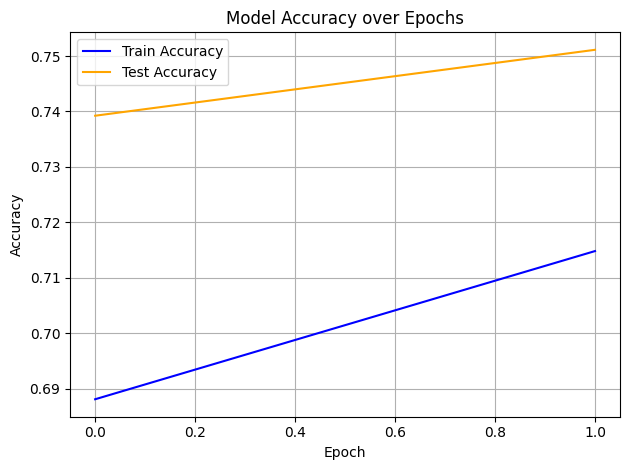

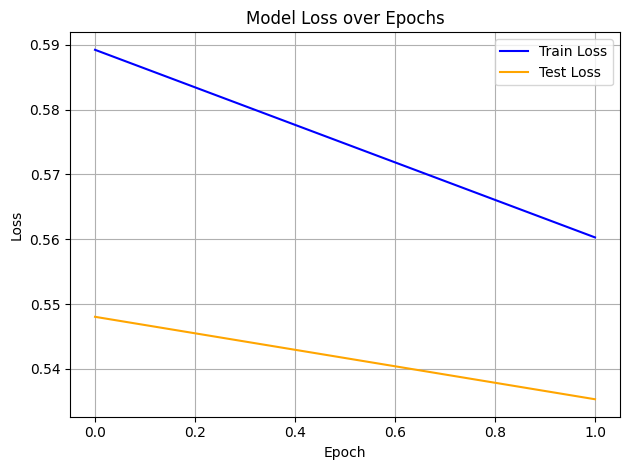

In [ ]:

# Plot train and test accuracy
plt.plot(history.history['accuracy'], color='blue', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Test Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot train and test loss
plt.plot(history.history['loss'], color='blue', label='Train Loss')
plt.plot(history.history['val_loss'], color='orange', label='Test Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Hybrid Model (LSTM + RNN)

In [ ]:
# Define the model architecture
lstm_model = Sequential()

# Add an LSTM layer as the first layer of the model
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedded_matrix], input_length=50, trainable=False))
lstm_model.add(LSTM(units=128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))

lstm_model.add(TimeDistributed(Dense(units=128)))

# Add an RNN layer as the last layer of the model
lstm_model.add(SimpleRNN(units=64, activation='relu'))


# Add a dense layer with sigmoid activation
lstm_model.add(Dense(1, activation="sigmoid"))

# Compile the model
lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/30
4890/4890 [==============================] - 900s 183ms/step - loss: 0.4263 - accuracy: 0.8017 - val_loss: 0.3628 - val_accuracy: 0.8364
Epoch 2/30
4890/4890 [==============================] - 889s 182ms/step - loss: 0.3614 - accuracy: 0.8372 - val_loss: 0.3229 - val_accuracy: 0.8579
Epoch 3/30
4890/4890 [==============================] - 884s 181ms/step - loss: 0.3344 - accuracy: 0.8515 - val_loss: 0.3205 - val_accuracy: 0.8565
Epoch 4/30
4890/4890 [==============================] - 892s 183ms/step - loss: 0.3161 - accuracy: 0.8604 - val_loss: 0.2918 - val_accuracy: 0.8728
Epoch 5/30
4890/4890 [==============================] - 890s 182ms/step - loss: 0.3041 - accuracy: 0.8675 - val_loss: 0.2858 - val_accuracy: 0.8776
Epoch 6/30
4890/4890 [==============================] - 894s 183ms/step - loss: 0.2942 - accuracy: 0.8725 - val_loss: 0.2813 - val_accuracy: 0.8796
Epoch 7/30
4890/4890 [==============================] - 891s 182ms/step - loss: 0.2894 - accuracy: 0.8742 - val_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


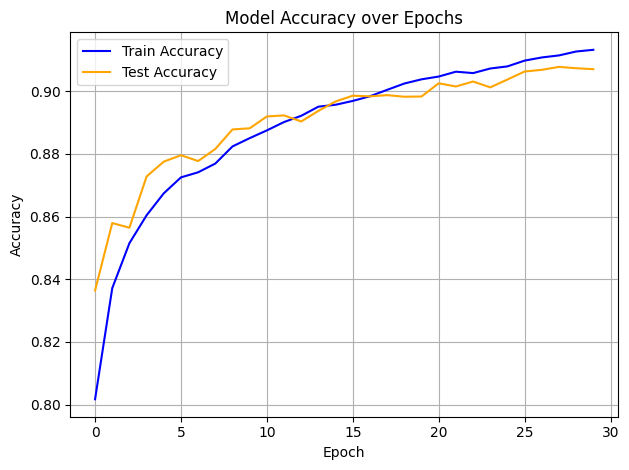

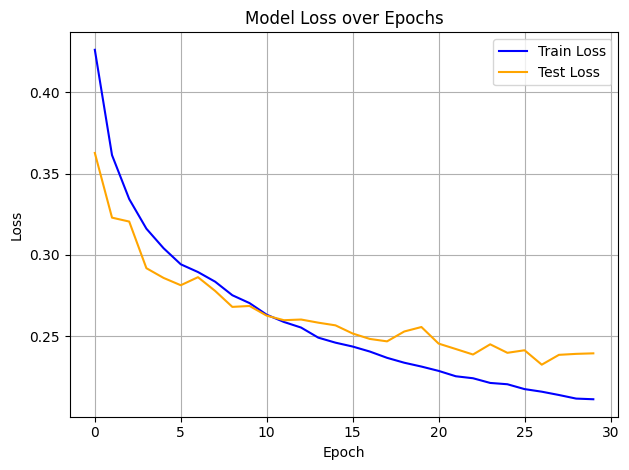

In [ ]:

# Plot train and test accuracy
plt.plot(history.history['accuracy'], color='blue', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Test Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot train and test loss
plt.plot(history.history['loss'], color='blue', label='Train Loss')
plt.plot(history.history['val_loss'], color='orange', label='Test Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the probabilities for the test set:
y_test_pred = lstm_model.predict(X_test)

# Convert the probabilities to binary predictions using a threshold of 0.5:
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Calculate the performance metrics:
accuracy = accuracy_score(y_test, y_test_pred_binary)
precision = precision_score(y_test, y_test_pred_binary)
recall = recall_score(y_test, y_test_pred_binary)
f1 = f1_score(y_test, y_test_pred_binary)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1223/1223 [==============================] - 38s 31ms/step
Accuracy: 0.91
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
